<h1 style='color:GREEN' align="center">MORTALITY RATE PREDICTABILITY</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
np.random.seed(42)

data=pd.read_csv('ntrvyadaya1.csv')

data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,DAYS
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-06-2013 00:00,09-07-2013,NO,NaN,D,31
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-08-2013 00:00,09-09-2013,NO,NaN,D,32
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D,64
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D,34
4,9,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,...,Karumuri Hospital,C,GUNTUR,Guntur,14-06-2014 00:00,16-06-2014,NO,NaN,D,2


In [2]:
data.isnull().sum()

                       0
AGE                    0
SEX                    0
CASTE_NAME             0
CATEGORY_CODE          0
CATEGORY_NAME          0
SURGERY_CODE           0
SURGERY                0
VILLAGE                0
MANDAL_NAME            0
DISTRICT_NAME          0
PREAUTH_DATE           0
PREAUTH_AMT            0
CLAIM_DATE             0
CLAIM_AMOUNT           0
HOSP_NAME              0
HOSP_TYPE              0
HOSP_LOCATION          0
HOSP_DISTRICT          0
SURGERY_DATE           0
DISCHARGE_DATE         0
Mortality Y / N        0
MORTALITY_DATE      4989
SRC_REGISTRATION       0
DAYS                   0
dtype: int64

In [3]:
data.drop(['MORTALITY_DATE'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

                    0
AGE                 0
SEX                 0
CASTE_NAME          0
CATEGORY_CODE       0
CATEGORY_NAME       0
SURGERY_CODE        0
SURGERY             0
VILLAGE             0
MANDAL_NAME         0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_NAME           0
HOSP_TYPE           0
HOSP_LOCATION       0
HOSP_DISTRICT       0
SURGERY_DATE        0
DISCHARGE_DATE      0
Mortality Y / N     0
SRC_REGISTRATION    0
DAYS                0
dtype: int64

In [5]:
ntr_nums=data.select_dtypes(include=[np.number])
ntr_nums.head()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS
0,1,56,12500,11000,31
1,2,37,12500,11000,32
2,3,50,12500,11500,64
3,4,45,12500,11000,34
4,9,56,40000,40000,2


In [6]:
ntr_cat=data.select_dtypes(include=[np.object])
ntr_cat.head()

,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,CLAIM_DATE,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION
0,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,08-03-2013 20:38,22-03-2017 20:25,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-06-2013 00:00,09-07-2013,NO,D
1,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,08-06-2013 07:26,22-03-2017 20:25,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-08-2013 00:00,09-09-2013,NO,D
2,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,08-09-2013 18:30,22-03-2017 20:25,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,D
3,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24-08-2013 19:37,22-03-2017 20:25,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,D
4,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,Guntur,06-10-2014 17:02,17-02-2017 19:21,Karumuri Hospital,C,GUNTUR,Guntur,14-06-2014 00:00,16-06-2014,NO,D


In [7]:
#ntr_nums=data.select_dtypes(include=[np.number])

#ntr_cat=data.select_dtypes(include=[np.object])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ntr_num=ntr_nums.apply(le.fit_transform)

#ntr_cat=ntr_cat.apply(le.fit_transform)

data_final=pd.concat([ntr_cat,ntr_num],axis=1)


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()



In [9]:
ntr_cat=ntr_cat.apply(le.fit_transform)

In [10]:
ntr_cat.head()

,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,CLAIM_DATE,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION
0,0,0,7,13,101,125,1336,470,8,1395,919,144,1,30,11,89,123,0,1
1,2,0,7,13,101,125,323,254,8,1404,919,144,1,30,11,91,126,0,1
2,2,0,7,13,101,125,1056,254,8,1407,919,144,1,30,11,186,262,0,1
3,2,0,7,13,101,125,2270,546,8,3708,919,144,1,30,11,296,402,0,1
4,2,2,24,0,310,54,2437,226,3,1376,776,93,0,8,3,170,226,0,1


In [11]:
data_final=pd.concat([ntr_cat,ntr_num],axis=1)

In [12]:
data_final.head()

,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,...,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS
0,0,0,7,13,101,125,1336,470,8,1395,...,11,89,123,0,1,0,56,22,146,31
1,2,0,7,13,101,125,323,254,8,1404,...,11,91,126,0,1,1,37,22,146,32
2,2,0,7,13,101,125,1056,254,8,1407,...,11,186,262,0,1,2,50,22,162,64
3,2,0,7,13,101,125,2270,546,8,3708,...,11,296,402,0,1,3,45,22,146,34
4,2,2,24,0,310,54,2437,226,3,1376,...,3,170,226,0,1,4,56,127,596,2


In [13]:
X = data_final.drop("Mortality Y / N",1) #Feature Matrix
y = data_final["Mortality Y / N"] 

<h2 style='color:blue' align="center"> STATISTICAL  CORRELATION HEATMAP </h2>

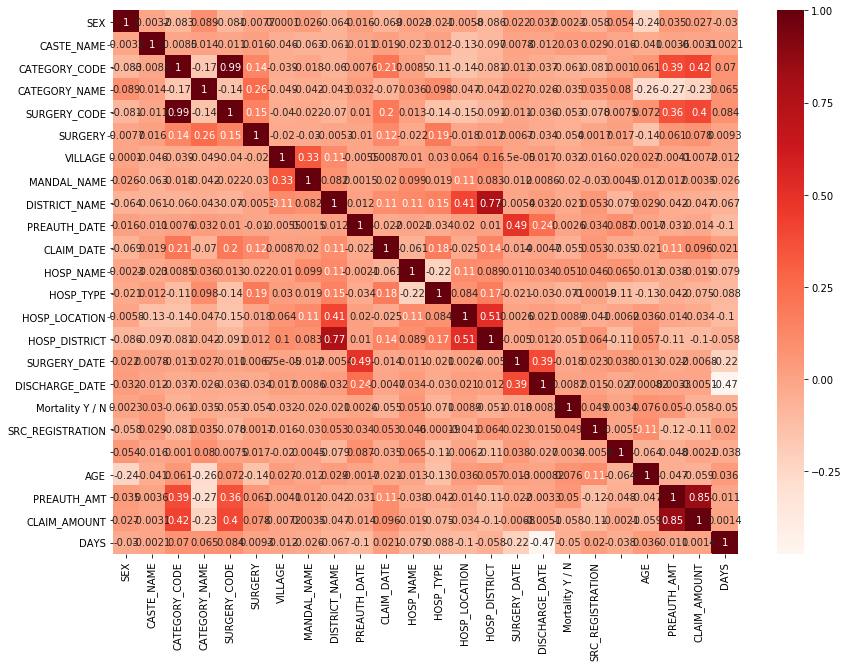

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(14,10))
#cor = data_final.corr()
sb.heatmap(data_final.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

<h2 style='color:blue' align="center"> FEATURE IMPORTANCE </h2>

C:\Users\siva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02996987 0.03836194 0.03361541 0.03207459 0.0374931  0.03962599
 0.04592814 0.05165145 0.04045602 0.04728624 0.05051518 0.04471572
 0.01541168 0.03859654 0.04163777 0.04625605 0.0402833  0.02397999
 0.05545698 0.0517537  0.05004223 0.09792013 0.04696797]


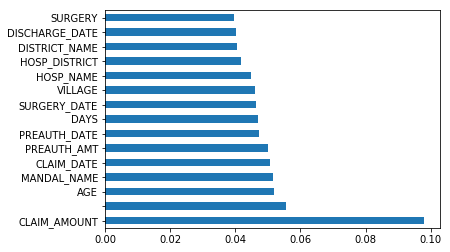

In [15]:
#import pandas as pd
#import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
#X = data_final.drop(["Mortality Y / N"],axis=1,inplace=True)  #independent columns
#y = data_final["Mortality Y / N"]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [16]:
#Correlation with output variable
cor=data_final.corr()
cor_target = abs(cor["Mortality Y / N"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_final.drop('Mortality Y / N',1) ,data_final[['Mortality Y / N']],test_size=0.33, random_state=42)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

#print('Scorelist:',select_feature.scores_)
#print('feature list:', X_train.columns)

## EDA

<h2 style='color:blue' align="center">REPRESENTATION ON MORTALITY and SEX </h2>

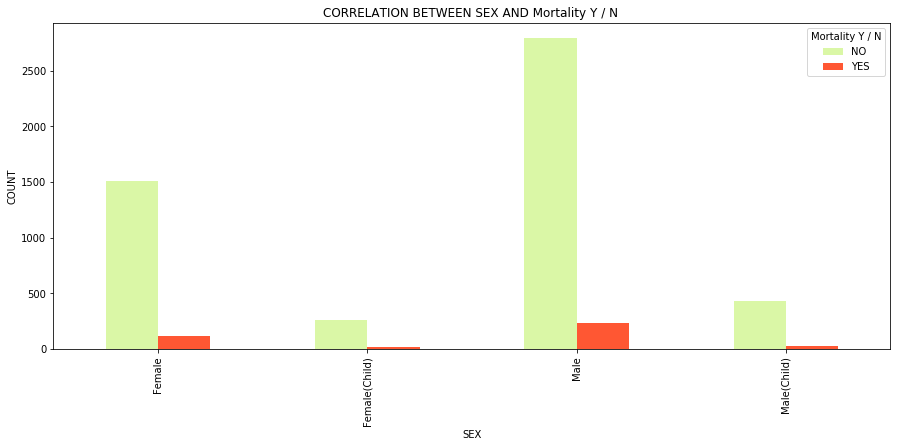

In [17]:
pd.crosstab(data.SEX,data['Mortality Y / N']).plot(kind='bar',figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title('CORRELATION BETWEEN SEX AND Mortality Y / N ')
plt.xlabel('SEX')
#plt.xticks(rotation=0)
plt.ylabel('COUNT')
plt.show()

<h2 style='color:RED' align="center">PLOTTING REPRESENTS  TOTAL COUNT OF MALE AND FEMALE</h2>

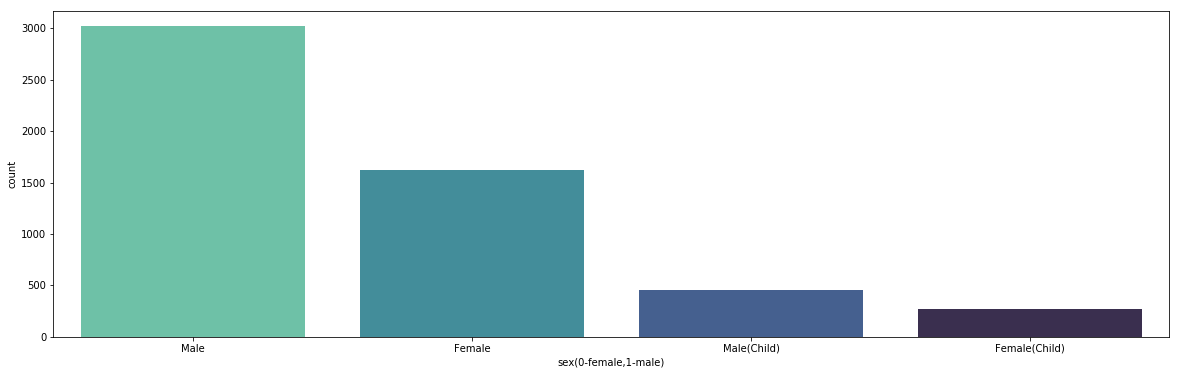

In [18]:
plt.figure(figsize=(20,6))
sb.countplot(x='SEX',data=data,palette='mako_r',order=data['SEX'].value_counts().index)
plt.xlabel("sex(0-female,1-male)")
plt.show()


<h2 style='color:RED' align="center">PLOTTING REPRESENTS CATEGORY_NAME </h2>

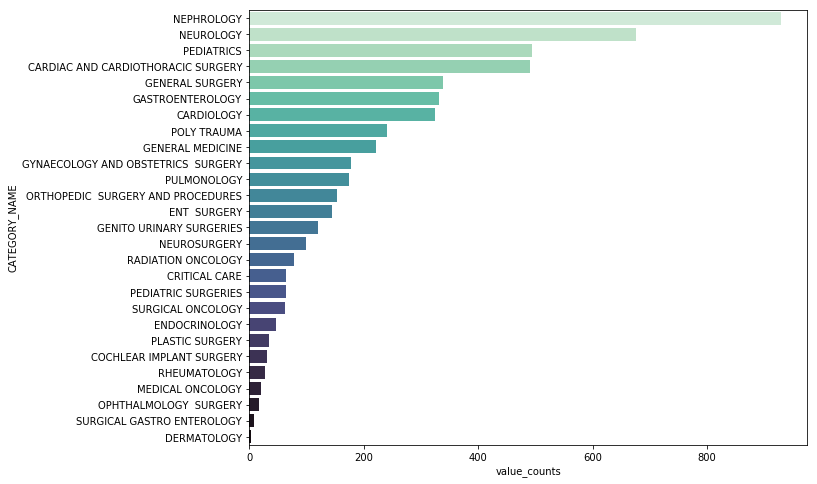

In [19]:
plt.figure(figsize=(10,8))
sb.countplot(y='CATEGORY_NAME',data=data,order=data['CATEGORY_NAME'].value_counts().index,palette='mako_r')
plt.ylabel("CATEGORY_NAME")
plt.xlabel("value_counts")
plt.show()

<h2 style='color:black' align="center">REPRESENTS  Mortality and Catgory Name</h2>

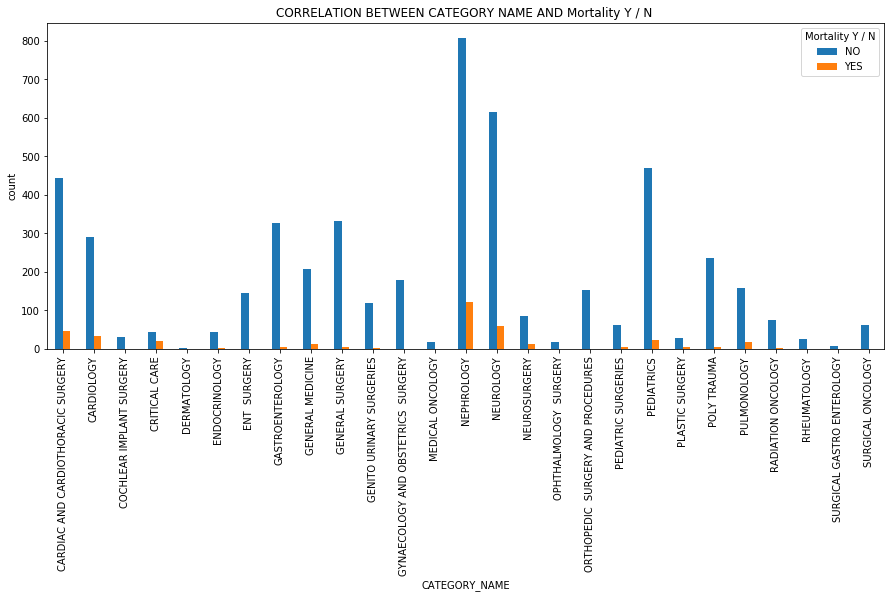

In [20]:
pd.crosstab(data.CATEGORY_NAME,data['Mortality Y / N']).plot(kind='bar',figsize=(15,6))
plt.title('CORRELATION BETWEEN CATEGORY NAME AND Mortality Y / N ')
plt.xlabel('CATEGORY_NAME')
#plt.xticks(rotation=0)
plt.ylabel('count')
plt.show()

<h2 style='color:blue' align="center">REPRESENTS AGE AND Mortality Y / N</h2>

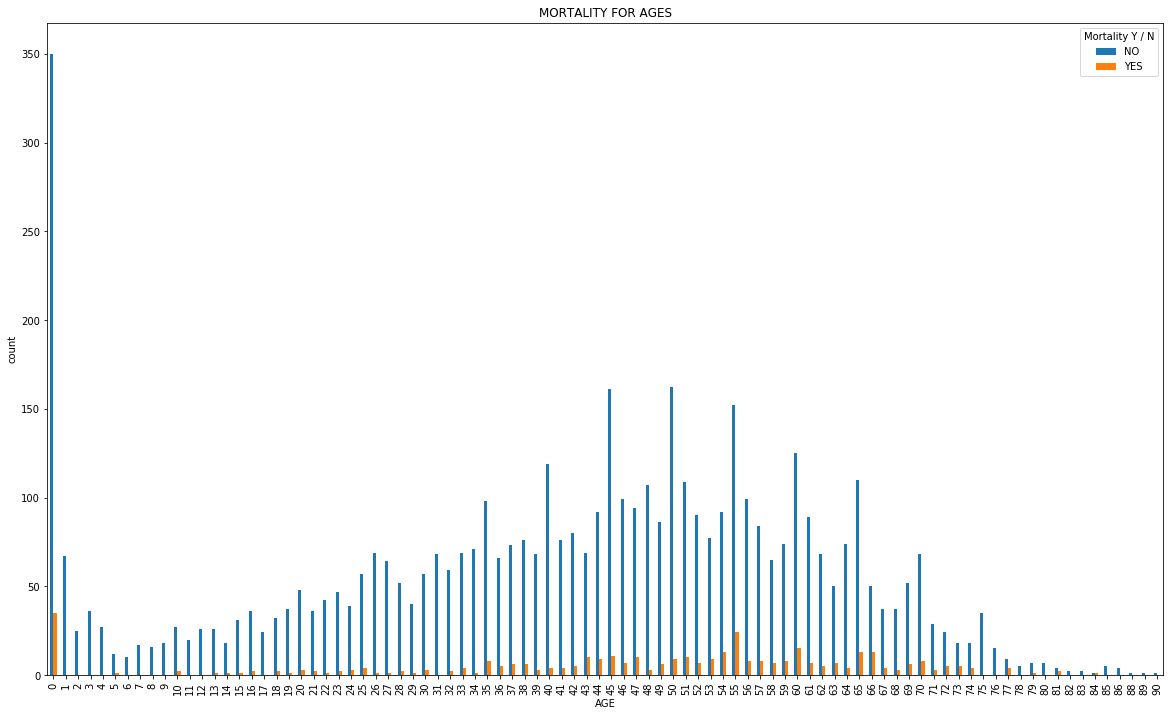

In [21]:
pd.crosstab(data.AGE,data['Mortality Y / N']).plot(kind='bar',figsize=(20,12))
plt.title("MORTALITY FOR AGES")
plt.xlabel("AGE")
plt.ylabel('count')
#plt.savefig("heart dusease and ages.png")
plt.show()

<h2 style='color:blue' align="center">Represents Correlation  based on Age and Gender</h2>

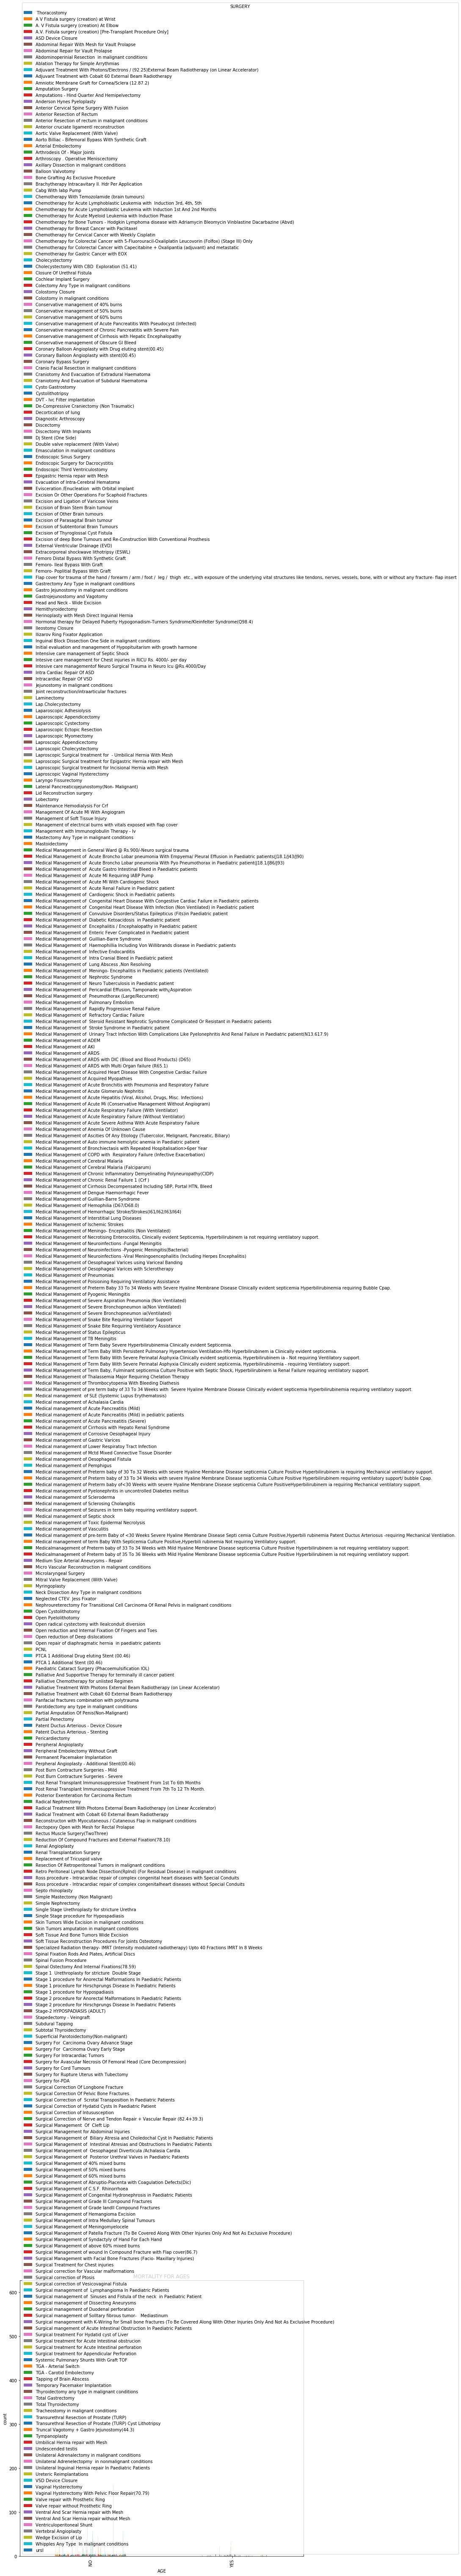

In [22]:
pd.crosstab(data['Mortality Y / N'],data.SURGERY).plot(kind='bar',figsize=(12,12))
plt.title("MORTALITY FOR AGES")
plt.xlabel("AGE")
plt.ylabel('count')
#plt.savefig("heart dusease and ages.png")
plt.show()



<h2 style='color:GREEN' align="center">PLOTTING ON MORTALITY</h2>

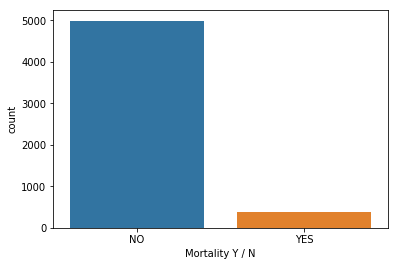

In [23]:

sb.countplot(x='Mortality Y / N',data=data)
plt.xlabel("Mortality Y / N")
plt.show()


### LOGISTIC

In [24]:
X1=data_final[['SEX', 'CATEGORY_NAME','SURGERY','AGE']]
y1=data_final['Mortality Y / N']

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X1_train,y1_train)

C:\Users\siva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
model.score(X1_train,y1_train)

predict=model.predict(X1_test)

from sklearn.metrics import accuracy_score

<h2 style='color:blue' align="corner">accuracy_score</h2>

In [26]:
b=accuracy_score(y1_test,predict)*100
print("MORTALITY RATE ACCURACY SCORE IS :", b)

MORTALITY RATE ACCURACY SCORE IS : 92.728297632469


In [27]:
#data_final.to_csv("predict2.csv")

In [28]:
mortality_df=pd.read_csv("predict2.csv")


df=model.predict(mortality_df)
df

mortality_df['predict_Mortality1']=df


<h2 style='color:blue' align="corner">Input Features</h2>

In [29]:
X1_test.head()

,SEX,CATEGORY_NAME,SURGERY,AGE
410,2,15,108,55
5294,3,19,210,0
2803,2,14,191,76
3957,2,1,8,48
4577,2,23,283,51


<h2 style='color:blue' align="corner">target_features</h2>

In [30]:
y1_test.head()

410     0
5294    0
2803    0
3957    0
4577    0
Name: Mortality Y / N, dtype: int32

<h2 style='color:blue' align="corner">Prediction_mortality</h2>

In [31]:
a=model.predict([[2,15,108,55]])
print("PREDICTION MORTALITY NO: 0, YES :1  OUTPUT IS :", a)

PREDICTION MORTALITY NO: 0, YES :1  OUTPUT IS : [0]


In [32]:
mortality_df.to_csv("predicted_mortality1.csv")

In [33]:
#data_final.to_csv("examples.csv")